<a href="https://colab.research.google.com/github/Carlosmagnobrusil/CarlosBrusil_projects/blob/main/Semana_6/bagged_trees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Arboles de regresión**
## *Creado por: Carlos Brusil*



*   Fecha de Creación: 11 de febrero de 2022 
*   Fechad de actualización: 11 de febrero de 2022
*   Descripción: Se realiza uuna tarea para poner en practica la tecnica supervisada de arboles de regresion con el fin de predecir los precios de la base de datos Kaggle  

In [180]:
from google.colab import drive
drive.mount('/content/drive') # uno my Drive al nuevo cuaderno

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [181]:
import pandas as pd #importo la libreria panda permite manipular y molderar los datos 
import numpy as np #importo la libreria numpy manipular y molderar los datos 
import matplotlib.pyplot as plt #importo libreria matplotlib que es una libreria que me permite realizar graficas en 2 dimensiones de de mis datos
from matplotlib import pyplot as pyplot #
import seaborn as sns #Esta libreria nos permite modificar la vizualizacion de los datos atraves de los coleres y mejorar presetancion de los mismo 
from sklearn.linear_model import LinearRegression #para realizar regresiones y modelos
from sklearn.preprocessing import StandardScaler #Herramienta para la estandarizaci[on de datos
from sklearn.neighbors import KNeighborsClassifier #herramienta que permite crear modelos KNN de clasificacion
from sklearn.neighbors import KNeighborsRegressor #herramienta que permite crear modelos KNN de regresion
from sklearn.model_selection import train_test_split #herramienta para validacion prueba entrebamiento
from sklearn.ensemble import BaggingClassifier #herramiento de clasificacion para bagged trees
from sklearn.ensemble import RandomForestClassifier #herramienta de para generar bosques aleatorios
from sklearn.ensemble import BaggingRegressor #Herramienta de regresion arboles baggin
from sklearn.tree import DecisionTreeRegressor #herramienta de creacion de arboles de regresion 
from sklearn.ensemble import RandomForestRegressor #herramienta para la creacion de bosque aleatorio de regresion
from sklearn.tree import export_text #extraccion de las reglas del arbol 
from sklearn import tree#herramienta de vizualizacion de arboles 
from sklearn import metrics

In [182]:
housing =  '/content/drive/MyDrive/Coding_Dojo/Semana 6/Data/kc_house_data.csv' #Nombro a la base
housing_df= pd.read_csv(housing) #le doy un nombre a la trama tener en cuenta que tipo dearchivo estoy leyendo
#ademas uso el argumento header para queno tome la primera fila como nombres de columna 
housing_df.head() #Observo que los datos hayan sido leidos de forma correcta

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [183]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [184]:
housing_df.shape

(21613, 21)

### Arbol de regresion 

In [185]:
colnames = housing_df.columns.values.tolist()
predictors= colnames[3:20]
target = colnames[2]

In [186]:
X = housing_df[predictors]
X.shape

(21613, 17)

In [187]:
X

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690
2,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720
3,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360
4,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530
21609,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830
21610,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020
21611,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410


In [188]:
y = housing_df[target]
y.shape

(21613,)

In [189]:
y

0        221900.0
1        538000.0
2        180000.0
3        604000.0
4        510000.0
           ...   
21608    360000.0
21609    400000.0
21610    402101.0
21611    400000.0
21612    325000.0
Name: price, Length: 21613, dtype: float64

In [191]:
price_tree = DecisionTreeRegressor(min_samples_split = 30, min_samples_leaf =10 , max_depth = 3, random_state = 0) #el random state se muestra en 0 para poder replicar 

In [192]:
price_tree.fit(X,y)

DecisionTreeRegressor(max_depth=3, min_samples_leaf=10, min_samples_split=30,
                      random_state=0)

In [193]:
text = export_text(price_tree)
print(text) #Extraccion de reglas 

|--- feature_8 <= 8.50
|   |--- feature_14 <= 47.53
|   |   |--- feature_2 <= 1938.00
|   |   |   |--- value: [269848.39]
|   |   |--- feature_2 >  1938.00
|   |   |   |--- value: [391466.11]
|   |--- feature_14 >  47.53
|   |   |--- feature_2 <= 2035.00
|   |   |   |--- value: [462801.39]
|   |   |--- feature_2 >  2035.00
|   |   |   |--- value: [654887.06]
|--- feature_8 >  8.50
|   |--- feature_2 <= 4185.00
|   |   |--- feature_14 <= 47.52
|   |   |   |--- value: [557955.71]
|   |   |--- feature_14 >  47.52
|   |   |   |--- value: [930286.81]
|   |--- feature_2 >  4185.00
|   |   |--- feature_2 <= 7940.00
|   |   |   |--- value: [1603157.44]
|   |   |--- feature_2 >  7940.00
|   |   |   |--- value: [5081430.00]



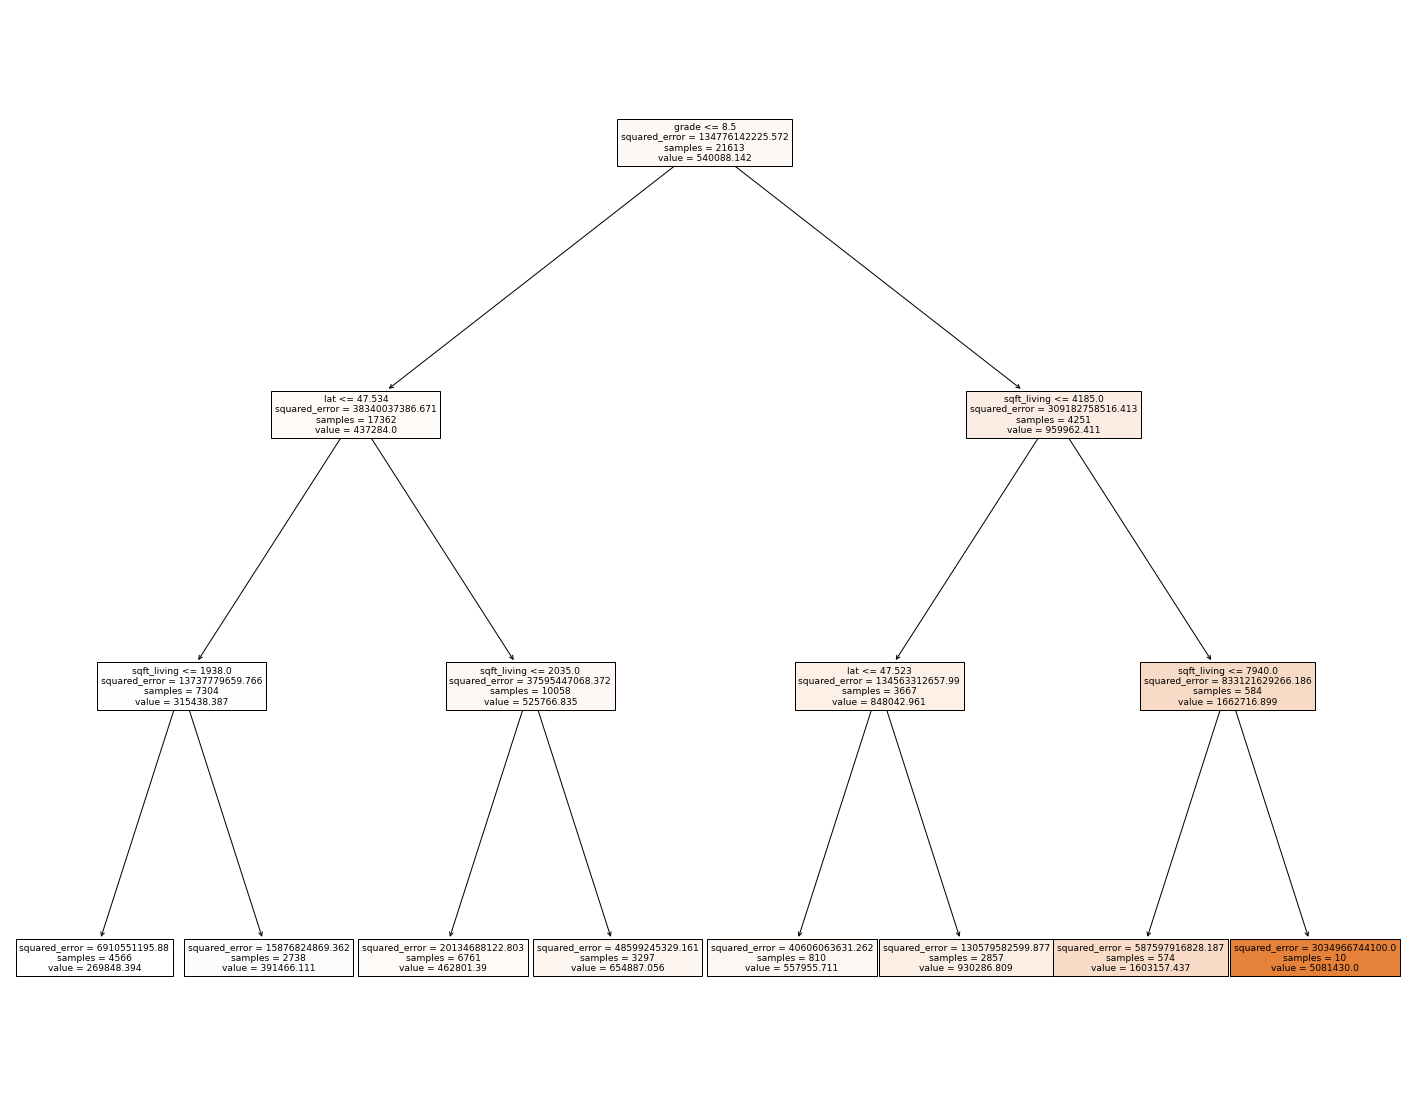

In [194]:
fig1 = pyplot.figure(figsize = (25,20))
_ = tree.plot_tree(price_tree, feature_names=housing_df.columns[3:20], class_names=housing_df.columns[2], filled = True)


In [195]:
pred0 = price_tree.predict(housing_df[predictors])
housing_df['predictions'] = pred0
round(housing_df[['predictions','price']],2)

,predictions,price
0,269848.39,221900.0
1,654887.06,538000.0
2,462801.39,180000.0
3,391466.11,604000.0
4,462801.39,510000.0
...,...,...
21608,462801.39,360000.0
21609,391466.11,400000.0
21610,462801.39,402101.0
21611,462801.39,400000.0


In [196]:
housing_df['ecm']=(housing_df['predictions']- housing_df['price'])**2 #Obtengo el error al cuadrado de cada una de mis observaciones 

In [197]:
round(sum(housing_df['ecm']/len(housing_df)),2) #obtengo el error cuadrado medio 

52976186194.92

##### Durante las pruebas se obser que al aumentar la profundidad el error cuadrado medio disminuye 

### Bosque de regresion 

In [198]:
price_forest = RandomForestRegressor(n_jobs = 5, oob_score= True, n_estimators= 1000)
price_forest.fit(X,y)

RandomForestRegressor(n_estimators=1000, n_jobs=5, oob_score=True)

In [199]:
housing_df['prediction_forest'] = price_forest.oob_prediction_

In [200]:
round(housing_df[['prediction_forest','predictions','price']],2)

,prediction_forest,predictions,price
0,247397.61,269848.39,221900.0
1,452756.17,654887.06,538000.0
2,291565.11,462801.39,180000.0
3,486596.94,391466.11,604000.0
4,518041.03,462801.39,510000.0
...,...,...,...
21608,383523.28,462801.39,360000.0
21609,415658.88,391466.11,400000.0
21610,328184.40,462801.39,402101.0
21611,400597.89,462801.39,400000.0


In [201]:
housing_df['ecm1']=(housing_df['prediction_forest']- housing_df['price'])**2

In [202]:
round(sum(housing_df['ecm1']/len(housing_df)),2)

15919559332.04

In [203]:
list(zip(predictors, price_forest.feature_importances_))

[('bedrooms', 0.003281843525963088),
 ('bathrooms', 0.007615044738485743),
 ('sqft_living', 0.2709831197400024),
 ('sqft_lot', 0.01830216721311716),
 ('floors', 0.0020751568801441987),
 ('waterfront', 0.03077931033723736),
 ('view', 0.01148977097325691),
 ('condition', 0.003082686796115408),
 ('grade', 0.31769791895159616),
 ('sqft_above', 0.020970506588451534),
 ('sqft_basement', 0.005578341017926952),
 ('yr_built', 0.0261617566704221),
 ('yr_renovated', 0.002218582598056532),
 ('zipcode', 0.0143246720871762),
 ('lat', 0.16258086822568138),
 ('long', 0.07031770431136607),
 ('sqft_living15', 0.03254054934500089)]

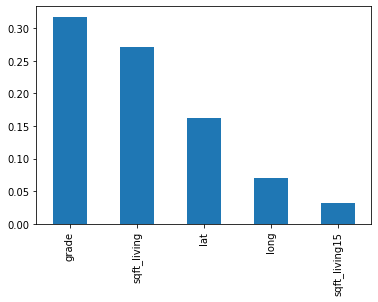

In [206]:
feat_importance = pd.Series(price_forest.feature_importances_, index = housing_df.columns[3:20])
feat_importance.nlargest(5).plot(kind = 'bar') #obtengo las variables mas importantes del modelo 



1.   ¿Cuáles son las características más importantes de tu modelo?

* Las caracteristicas mas importantes del modelo son las que se presentan en el grafico superior 

2.   ¿Qué otros parámetros podrías haber intentado ajustar?

* Los parametrso que seria bueno usar poara utlizar es realizar un estudio de precision con el numero de arboles creados 

